绘制不同对比方法的prob的boxplot

In [4]:
%config InlineBackend.figure_format = 'svg' 
# 如果要保存svg格式图片，可以用上面的命令

import os
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

# plt.style.use("ggplot")

In [5]:
# mapping experiments and mapping color
mapping_exp = {
    # 'PhiTrans+': "new_PhiTrans_align_sim+tile5ktwice500_abmilsel0", 
               'PhiTrans': "new_PhiTrans_align_sim_tile5ktwice500", 
               'PhiTrans+': "new_PhiTrans_align_sim+tile5ktwice500_abmilsel0", 
               'PMIL-Cosine': "new_ProtoMIL_sim_Cosine_mean_tileAlltwice500_0insteval",
               "PMIL-Euclidean": "new_ProtoMIL_sim_Euclidean_mean_tile5ktwice500_0insteval",
               "CLAM-B8":  "new_CLAM_8", 
               "CLAM-B32": "new_CLAM", 
               "ABMIL": "new_ABMIL_tile5k_all", 
               "TRANS": "new_Transformer"}

mapping_color = {
    'PhiTrans+': "#BC4CAB", 
    'PhiTrans': "#CD79C0", 'PMIL-Cosine': "#dd91b8", "PMIL-Euclidean": "#F4CEDD",
                "CLAM-B8":  "#B6C9D8", "CLAM-B32": "#C5B5E6", "ABMIL": "#C7C826", "TRANS": "#799f80"}

>>>>>>>>>>>>>>>>>>>>>>>PhiTrans: new_PhiTrans_align_sim_tile5ktwice500
T-Statistic: 28572.0
P-Value: 6.692879688445811e-41
>>>>>>>>>>>>>>>>>>>>>>>PMIL-Cosine: new_ProtoMIL_sim_Cosine_mean_tileAlltwice500_0insteval
T-Statistic: 31062.0
P-Value: 4.754885203624299e-36
>>>>>>>>>>>>>>>>>>>>>>>PMIL-Euclidean: new_ProtoMIL_sim_Euclidean_mean_tile5ktwice500_0insteval
T-Statistic: 33555.0
P-Value: 1.648891943106855e-31
>>>>>>>>>>>>>>>>>>>>>>>CLAM-B8: new_CLAM_8
T-Statistic: 39496.0
P-Value: 5.733157206942396e-22
>>>>>>>>>>>>>>>>>>>>>>>CLAM-B32: new_CLAM
T-Statistic: 39825.0
P-Value: 1.7148473478007914e-21
>>>>>>>>>>>>>>>>>>>>>>>ABMIL: new_ABMIL_tile5k_all
T-Statistic: 37461.0
P-Value: 4.928823509708018e-25
>>>>>>>>>>>>>>>>>>>>>>>TRANS: new_Transformer


/tmp/ipykernel_2365918/871550791.py:26: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=total_pd, x="label", y="prob_pos", palette=["#B6C9D8", "#BC4CAB"], size=3, ax=ax[idx])
/tmp/ipykernel_2365918/871550791.py:26: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=total_pd, x="label", y="prob_pos", palette=["#B6C9D8", "#BC4CAB"], size=3, ax=ax[idx])
/tmp/ipykernel_2365918/871550791.py:26: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=total_pd, x="label", y="prob_pos", palette=["#B6C9D8", "#BC4CAB"], size=3, ax=ax[idx])
/tmp/ipykernel_2365918/871550791.py:26: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=total_pd, x="label", y="prob_pos", palette=["#B6C9D8", "#BC4CAB"], size=3, ax=ax[idx])
/tmp/ipykernel_2365918/871550791.py:26: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.st

T-Statistic: 43145.0
P-Value: 5.345984289198327e-17


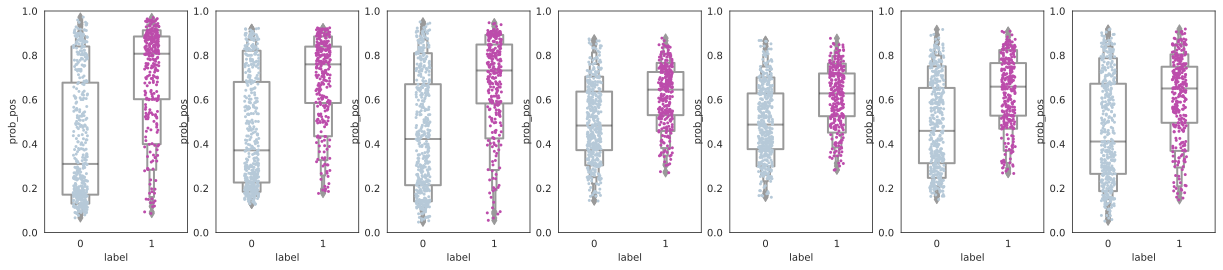

In [10]:
from scipy import stats
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "split_latest_test_0_results.csv"


fig, ax = plt.subplots(1, len(mapping_exp.keys()), figsize=(21, 4))

times = 5
for idx, one_exp in enumerate(mapping_exp.keys()):
    exp_name = mapping_exp[one_exp]
    exp_color = mapping_color[one_exp]

    print(f">>>>>>>>>>>>>>>>>>>>>>>{one_exp}: {exp_name}")

    total_pd = pd.DataFrame()
    
    for tidx in range(times):
        eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}", filename))
        total_pd = pd.concat([total_pd, eval_res], axis=0)
    

    sns.set_style("white")
    ax[idx].set(ylim=[0.0, 1.0])
    sns.boxenplot(data=total_pd, x="label", y="prob_pos", palette=["#FFFFFF", "#FFFFFF"], width=0.5, linewidth=2, ax=ax[idx])
    # sns.violinplot(data=total_pd, x="label", y="prob_pos", palette=["#eeeeee", "#eeeeee"], ax=ax[idx])
    sns.stripplot(data=total_pd, x="label", y="prob_pos", palette=["#B6C9D8", "#BC4CAB"], size=3, ax=ax[idx])
    
    # Assuming you have two groups: group1 and group2
    group1 = total_pd[total_pd['label'] == 0]['prob_pos']
    group2 = total_pd[total_pd['label'] == 1]['prob_pos']

    # Perform t-test
    # statistic, p_value = stats.ttest_ind(group1, group2)
    # statistic, p_value = stats.friedmanchisquare(group1, group2)
    statistic, p_value = stats.mannwhitneyu(group1, group2)
    
    # Print the results
    print("T-Statistic:", statistic)
    print("P-Value:", p_value)


In [7]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"


total_pd = pd.DataFrame()

for idx, one_exp in enumerate(mapping_exp.keys()):
    exp_name = mapping_exp[one_exp]
    exp_color = mapping_color[one_exp]

    print(f">>>>>>>>>>>>>>>>>>>>>>>{one_exp}: {exp_name}")

    
    eval_res = pd.read_csv(os.path.join(root_path, exp_name, filename))
    total_pd = pd.concat([total_pd, eval_res], axis=0)
    
total_pd.to_csv(os.path.join(root_path, "comparison_res_all_methods.csv"))
total_pd


>>>>>>>>>>>>>>>>>>>>>>>PhiTrans: new_PhiTrans_align_sim_tile5ktwice500
>>>>>>>>>>>>>>>>>>>>>>>PhiTrans+: new_PhiTrans_align_sim+tile5ktwice500_abmilsel0
>>>>>>>>>>>>>>>>>>>>>>>PMIL-Cosine: new_ProtoMIL_sim_Cosine_mean_tileAlltwice500_0insteval
>>>>>>>>>>>>>>>>>>>>>>>PMIL-Euclidean: new_ProtoMIL_sim_Euclidean_mean_tile5ktwice500_0insteval
>>>>>>>>>>>>>>>>>>>>>>>CLAM-B8: new_CLAM_8
>>>>>>>>>>>>>>>>>>>>>>>CLAM-B32: new_CLAM
>>>>>>>>>>>>>>>>>>>>>>>ABMIL: new_ABMIL_tile5k_all
>>>>>>>>>>>>>>>>>>>>>>>TRANS: new_Transformer


,Unnamed: 0,time,fold,neg_precision,neg_recall,neg_f1-score,neg_support,pos_precision,pos_recall,pos_f1-score,...,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support,balanced acc,auc
0,0,0.000000,0.0,0.837838,0.688889,0.756098,90.0,0.631579,0.800000,0.705882,...,0.734708,0.744444,0.730990,150.0,0.755334,0.733333,0.736011,150.0,0.744444,0.777778
1,1,1.000000,0.0,0.943396,0.555556,0.699301,90.0,0.587629,0.950000,0.726115,...,0.765513,0.752778,0.712708,150.0,0.801089,0.713333,0.710026,150.0,0.752778,0.842963
2,2,2.000000,0.0,0.871429,0.677778,0.762500,90.0,0.637500,0.850000,0.728571,...,0.754464,0.763889,0.745536,150.0,0.777857,0.746667,0.748929,150.0,0.763889,0.798704
3,3,3.000000,0.0,0.841270,0.588889,0.692810,90.0,0.574713,0.833333,0.680272,...,0.707991,0.711111,0.686541,150.0,0.734647,0.686667,0.687795,150.0,0.711111,0.759444
4,4,4.000000,0.0,0.810127,0.711111,0.757396,90.0,0.633803,0.750000,0.687023,...,0.721965,0.730556,0.722210,150.0,0.739597,0.726667,0.729247,150.0,0.730556,0.798519
5,mean,2.000000,0.0,0.860812,0.644444,0.733621,90.0,0.613045,0.836667,0.705573,...,0.736928,0.740556,0.719597,150.0,0.761705,0.721333,0.722402,150.0,0.740556,0.795481
6,std,1.581139,0.0,0.051019,0.068041,0.034452,0.0,0.029529,0.073974,0.021996,...,0.023403,0.020469,0.022077,0.0,0.027720,0.022804,0.023909,0.0,0.020469,0.031170
0,0,0.000000,0.0,0.842857,0.655556,0.737500,90.0,0.612500,0.816667,0.700000,...,0.727679,0.736111,0.718750,150.0,0.750714,0.720000,0.722500,150.0,0.736111,0.799630
1,1,1.000000,0.0,0.849315,0.688889,0.760736,90.0,0.636364,0.816667,0.715328,...,0.742839,0.752778,0.738032,150.0,0.764134,0.740000,0.742573,150.0,0.752778,0.832407
2,2,2.000000,0.0,0.842857,0.655556,0.737500,90.0,0.612500,0.816667,0.700000,...,0.727679,0.736111,0.718750,150.0,0.750714,0.720000,0.722500,150.0,0.736111,0.775370
